<a href="https://colab.research.google.com/github/gkunal8019/Cointab-Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the LHS data (X's internal data)
od = pd.read_excel("https://archive.org/download/company-x-order-report/Company%20X%20-%20Order%20Report.xlsx")
sku = pd.read_excel("https://archive.org/download/company-x-order-report/Company%20X%20-%20SKU%20Master.xlsx")
zip_cd = pd.read_excel("https://archive.org/download/company-x-order-report/Company%20X%20-%20Pincode%20Zones.xlsx")

# Load the RHS data (courier company invoice)
invoice = pd.read_excel("https://archive.org/download/company-x-order-report/Courier%20Company%20-%20Invoice.xlsx")
rates = pd.read_excel("https://archive.org/download/company-x-order-report/Courier%20Company%20-%20Rates.xlsx")

In [22]:
print("order report shape {} \nzip code shape {} \nSKU Master data shape {}".format(od.shape,zip_cd.shape,sku.shape))
print("invoice shape {} \nrates shape {} ".format(invoice.shape,rates.shape))

order report shape (400, 3) 
zip code shape (124, 3) 
SKU Master data shape (66, 2)
invoice shape (124, 8) 
rates shape (1, 20) 


In [23]:
od.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [24]:
zip_cd.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [25]:
sku.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [26]:
rates.head()


,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


1) Inner joining sku and order data for getting weight of each order

In [27]:
order_details = pd.merge(od, sku , on='SKU', how='inner')

In [28]:
order_details.shape


(401, 4)

In [29]:
zip_cd['Warehouse Pincode'].value_counts()


121003    124
Name: Warehouse Pincode, dtype: int64

In [30]:
zip_cd.drop(['Warehouse Pincode'] , axis=1,inplace=True) # warehouse pincode is same for each zip_cd so we drop that column 


In [31]:
zip_cd.shape

(124, 2)

2) Multiplying order qty and weight for getting Total weight in gram

In [32]:
order_details['Total_Weight_kg']=(order_details['Order Qty']*order_details['Weight (g)'])/1000
order_details.head()

,ExternOrderNo,SKU,Order Qty,Weight (g),Total_Weight_kg
0,2001827036,8904223818706,1.0,127,0.127
1,2001821995,8904223818706,1.0,127,0.127
2,2001819252,8904223818706,1.0,127,0.127
3,2001816996,8904223818706,1.0,127,0.127
4,2001814580,8904223818706,1.0,127,0.127


In [33]:
# grouping based on orders
order_details = order_details.groupby(['ExternOrderNo']).agg(sum) # grouping order details

In [35]:
order_details.shape

(124, 3)

In [38]:
# maximum wt in our order
order_details['Total_Weight_kg'].max()

3.08

In [39]:
# wt slab function - this function assign wt slab to weight in kg 
def wt_slab(x):
    if(x<=.5):
        return .5
    elif(x<=1 and x>.5):
        return 1
    elif(x<=1.5 and x>1):
        return 1.5
    elif(x<=2 and x>1.5):
        return 2
    elif(x<=2.5 and x>2):
        return 2.5
    elif(x<=3 and x>2.5):
        return 3
    elif(x<3.5 and x>3):
        return 3.5

In [40]:
order_details.reset_index(inplace=True)

In [41]:
order_details=pd.DataFrame(order_details[['ExternOrderNo','Total_Weight_kg']])

In [43]:
order_details.shape

(124, 2)

In [45]:
order_details['wt_slab_as_per_x']=order_details['Total_Weight_kg'].apply(wt_slab)


In [46]:
order_details=pd.concat([order_details,zip_cd],axis=1)
order_details

,ExternOrderNo,Total_Weight_kg,wt_slab_as_per_x,Customer Pincode,Zone
0,2001806210,0.220,0.5,507101,d
1,2001806226,0.480,0.5,486886,d
2,2001806229,0.500,0.5,532484,d
3,2001806232,1.302,1.5,143001,b
4,2001806233,0.245,0.5,515591,d
...,...,...,...,...,...
119,2001821995,0.477,0.5,325207,b
120,2001822466,1.376,1.5,303702,b
121,2001823564,0.672,1.0,313301,b
122,2001825261,1.557,2.0,173212,e


In [47]:
# renaming column names for convienience in final analysis 
order_details.columns=['Order ID', 'Total_Weight_kg_x', 'wt_slab_as_per_x',
       'Customer Pincode_x', 'Zone_x']
 
# applying weight slab to weight assigned by courier company side
invoice['wt_slab_courier_company']=invoice['Charged Weight'].apply(wt_slab)

In [49]:
ds= pd.merge(order_details,invoice,on='Order ID',how='inner') # joining based on order id 

In [50]:
ds.head()

,Order ID,Total_Weight_kg_x,wt_slab_as_per_x,Customer Pincode_x,Zone_x,AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),wt_slab_courier_company
0,2001806210,0.220,0.5,507101,d,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0
1,2001806226,0.480,0.5,486886,d,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0
2,2001806229,0.500,0.5,532484,d,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0
3,2001806232,1.302,1.5,143001,b,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5
4,2001806233,0.245,0.5,515591,d,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0


In [51]:
# this function calculated extra weight factor after first .5kg
def wt_slb_additional_factor(x):
    factor=x/.5
    additonal_factor=factor-1
    return additonal_factor

In [52]:
# making a new column in ds dataframe to identify which wtslab contains additional factors
ds['additional_factor']=ds['wt_slab_as_per_x'].apply(wt_slb_additional_factor)

In [56]:
ds.head()

,Order ID,Total_Weight_kg_x,wt_slab_as_per_x,Customer Pincode_x,Zone_x,AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),wt_slab_courier_company,additional_factor
0,2001806210,0.220,0.5,507101,d,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,0.0
1,2001806226,0.480,0.5,486886,d,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,0.0
2,2001806229,0.500,0.5,532484,d,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,0.0
3,2001806232,1.302,1.5,143001,b,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,2.0
4,2001806233,0.245,0.5,515591,d,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,0.0


In [59]:
ds['Type of Shipment'].value_counts()

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64

In [61]:
# we have two types of shipments Forward charges and Forward and RTO charges.so we groupby them applying charges rule as given 

In [60]:
x_fc=ds.groupby('Type of Shipment').get_group('Forward charges') # this data contains only those records which have Forward charges mentioned

In [62]:
# cost functions for forward charges 
def fixed_forward_charge(x):
    if(x=='a'):
        return 29.5
    elif(x=='b'):
        return 33
    elif(x=='c'):
        return 40.1
    elif(x=='d'):
        return 45.4
    elif(x=='e'):
        return 56.6
def additional_forward_charge(x):
    if(x=='a'):
        return 23.6
    elif(x=='b'):
        return 28.3
    elif(x=='c'):
        return 38.9
    elif(x=='d'):
        return 44.8
    elif(x=='e'):
        return 55.5

In [63]:
x_fc['fixed_charge_fc']=x_fc['Zone_x'].apply(fixed_forward_charge)
x_fc['additional_charge_fc']=x_fc['Zone_x'].apply(additional_forward_charge)

In [64]:
# expected cost by company x which has Forward charges 
x_fc['Expected_cost']=x_fc['fixed_charge_fc'] + x_fc['additional_factor']*x_fc['additional_charge_fc']

In [65]:
# x_fc_rto contains columns which ahve forward and rto rate charge
x_fc_rto=ds.groupby('Type of Shipment').get_group('Forward and RTO charges')

In [66]:
x_fc_rto['fixed_charge_fc']=x_fc_rto['Zone_x'].apply(fixed_forward_charge)
x_fc_rto['additional_charge_fc']=x_fc_rto['Zone_x'].apply(additional_forward_charge)

In [67]:
# function for Forward and RTO charges 
def fixed_rto_charge_zone_wise(x):
    if(x=='a'):
        return 13.6
    elif(x=='b'):
        return 20.5
    elif(x=='c'):
        return 31.9
    elif(x=='d'):
        return 41.3
    elif(x=='e'):
        return 50.7
def additional_rto_charge_zone_wise(x):
    if(x=='a'):
        return 23.6
    elif(x=='b'):
        return 28.3
    elif(x=='c'):
        return 38.9
    elif(x=='d'):
        return 44.8
    elif(x=='e'):
        return 55.5

In [68]:
x_fc_rto['fixed_rto_charge']=x_fc_rto['Zone_x'].apply(fixed_rto_charge_zone_wise)
x_fc_rto['additional_rto_charge']=x_fc_rto['Zone_x'].apply(additional_rto_charge_zone_wise)

calculating expected cost

In [69]:
x_fc['Expected_cost']=x_fc['fixed_charge_fc'] + x_fc['additional_factor']*x_fc['additional_charge_fc']
x_fc_rto['Expected_cost']=x_fc_rto['fixed_charge_fc']+x_fc_rto['fixed_rto_charge']+x_fc_rto['additional_rto_charge']*x_fc_rto['additional_factor']+x_fc_rto['additional_charge_fc']*x_fc_rto['additional_factor']

In [70]:
ds=pd.concat([x_fc,x_fc_rto])

In [71]:
ds.sort_index(inplace=True)

In [73]:
# making column diffeence which shows the diffeences between the cost 
ds['difference']=ds['Expected_cost']-ds['Billing Amount (Rs.)']
 
# making output table 1 as required for solution 
df=pd.DataFrame(ds[['Order ID','AWB Code','Total_Weight_kg_x','wt_slab_as_per_x','Charged Weight','wt_slab_courier_company',
                   'Zone_x','Zone','Expected_cost','Billing Amount (Rs.)','difference']])

In [74]:
df

,Order ID,AWB Code,Total_Weight_kg_x,wt_slab_as_per_x,Charged Weight,wt_slab_courier_company,Zone_x,Zone,Expected_cost,Billing Amount (Rs.),difference
0,2001806210,1091117221940,0.220,0.5,2.92,3.0,d,b,45.4,174.5,-129.1
1,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.4,90.2,-44.8
2,2001806229,1091117222080,0.500,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
3,2001806232,1091117222124,1.302,1.5,1.30,1.5,b,d,89.6,135.0,-45.4
4,2001806233,1091117222135,0.245,0.5,0.78,1.0,d,b,45.4,61.3,-15.9
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.477,0.5,0.50,0.5,b,d,33.0,45.4,-12.4
120,2001822466,1091121305541,1.376,1.5,1.10,1.5,b,d,89.6,135.0,-45.4
121,2001823564,1091121666133,0.672,1.0,0.70,1.0,b,d,110.1,172.8,-62.7
122,2001825261,1091121981575,1.557,2.0,1.60,2.0,e,d,440.3,345.0,95.3


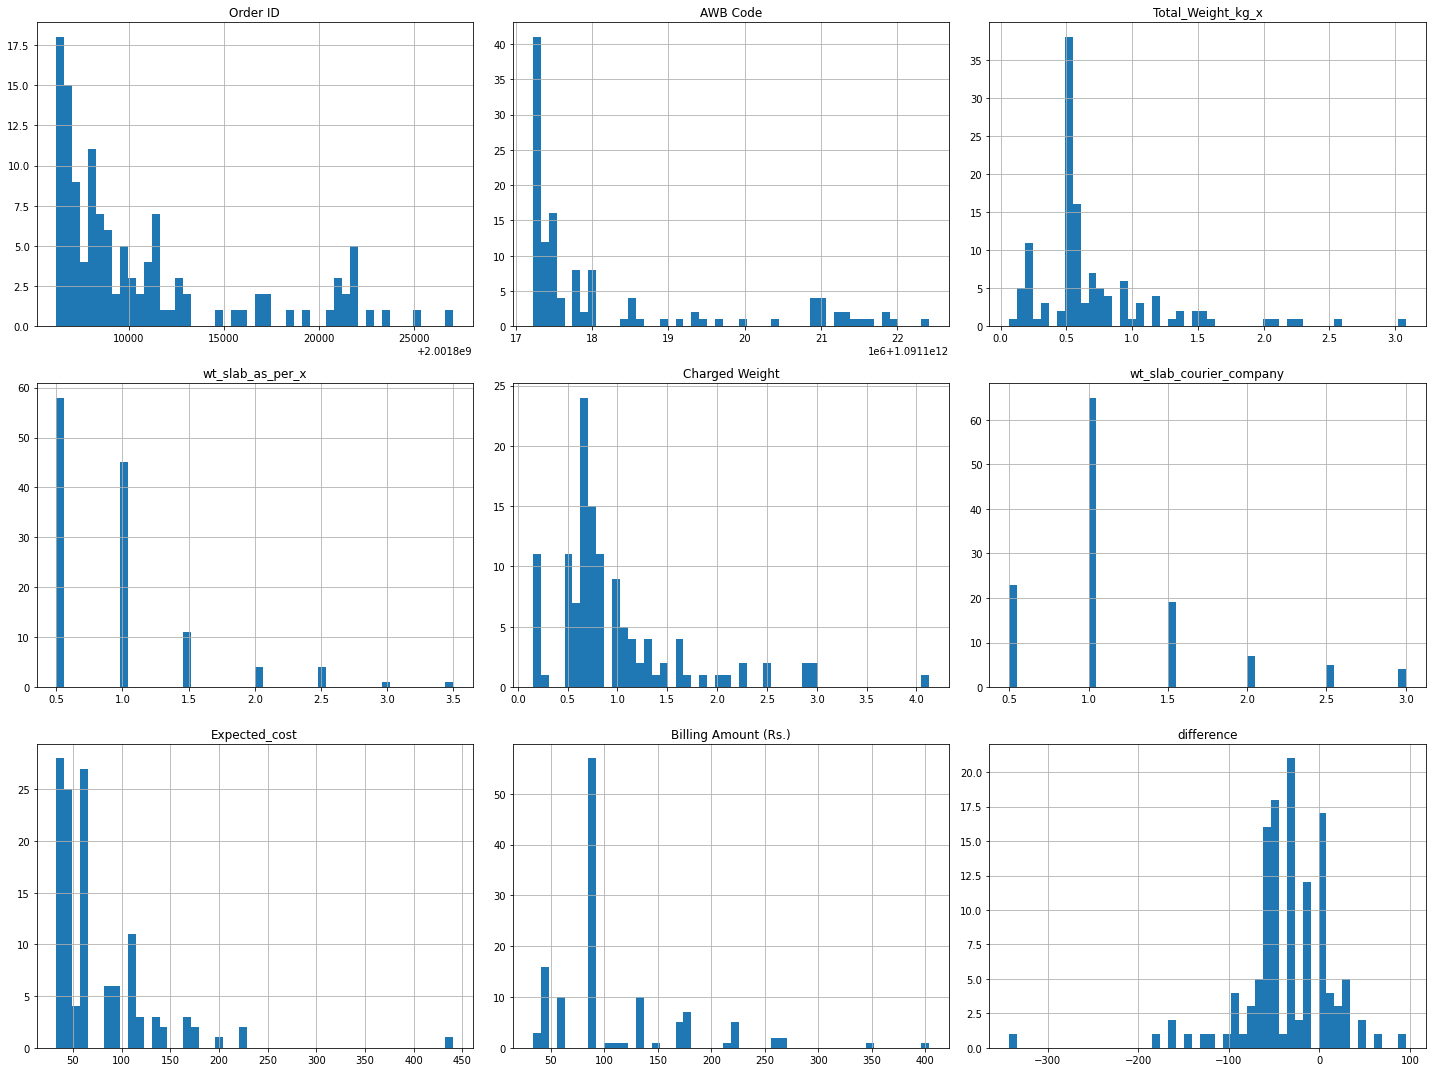

In [126]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


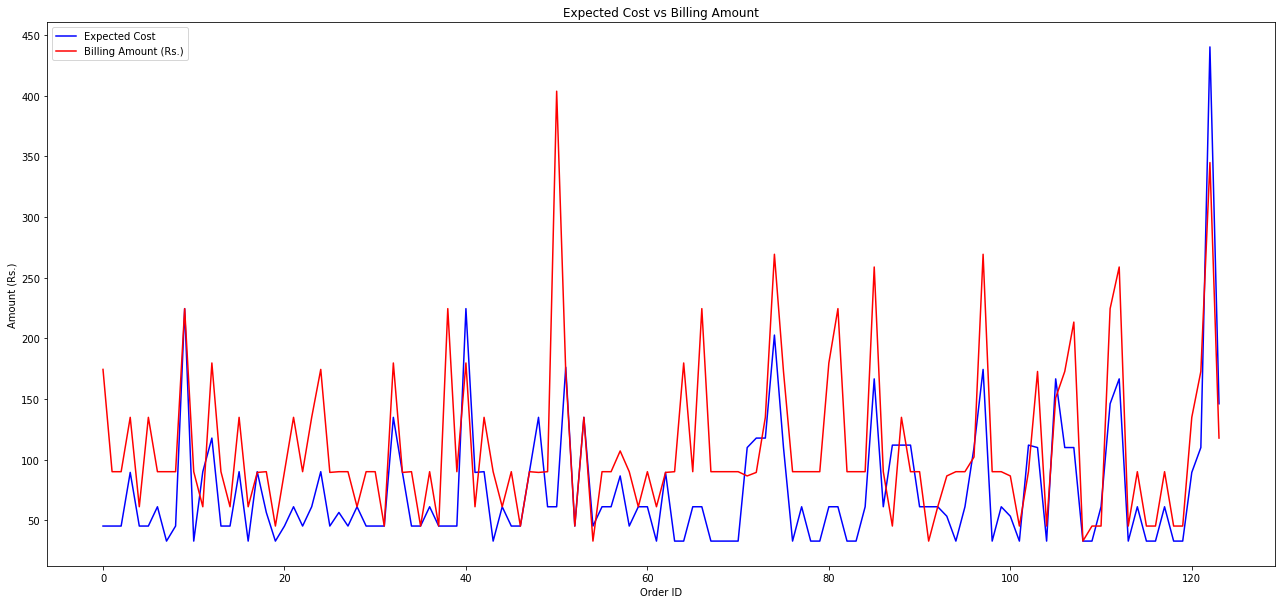

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 10))
plt.plot(df['Expected_cost'], color='blue', label='Expected Cost')
plt.plot(df['Billing Amount (Rs.)'], color='red', label='Billing Amount (Rs.)')
plt.title('Expected Cost vs Billing Amount')
plt.xlabel('Order ID')
plt.ylabel('Amount (Rs.)')
plt.legend()
plt.show()


**CONCLUSION** 


It can be concluded from the above plot that the billing amount charged by the courier company is increasing as compared to the expected cost. The difference between the two values is not constant and there seems to be a clear upward trend in the billing amount. This could indicate that the courier company is overcharging its customers or using a different pricing model for their deliveries. Further investigation may be needed to determine the cause of this difference

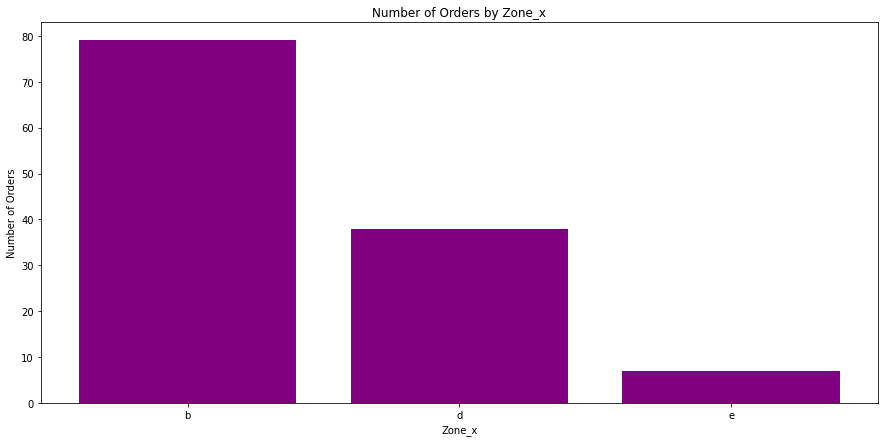

In [145]:
plt.figure(figsize=(15, 7))
plt.bar(df['Zone_x'].value_counts().index, df['Zone_x'].value_counts().values, color='purple')
plt.title('Number of Orders by Zone_x')
plt.xlabel('Zone_x')
plt.ylabel('Number of Orders')
plt.show()


In [75]:
#df.to_csv('Cointab_Output_1.csv') # this code has been used to export dataframe 

## Output 2

In [76]:
print("Total orders where X has been correctly charged count = {}".format(ds[ds['difference']==0].shape[0]))
print("Total Correct invoice amount {}".format(ds[ds['difference']==0]['Expected_cost'].sum()))

Total orders where X has been correctly charged count = 14
Total Correct invoice amount 1044.0


In [116]:
(ds['difference']==0).value_counts()

False    110
True      14
Name: difference, dtype: int64

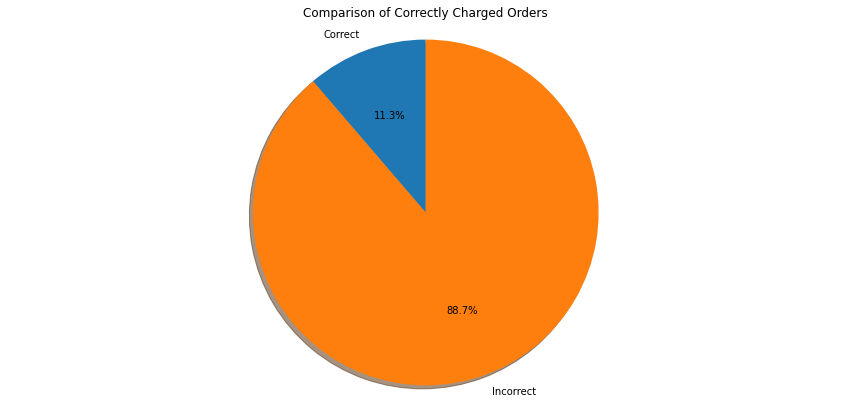

In [142]:
import matplotlib.pyplot as plt

# Data
correct_count = (ds['difference']==0).value_counts()[True]
incorrect_count = (ds['difference']==0).value_counts()[False]

# Plot
labels = ['Correct', 'Incorrect']
sizes = [correct_count, incorrect_count]

fig1, ax1 = plt.subplots(figsize=(15, 7))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Comparison of Correctly Charged Orders")
plt.show()



In [77]:
# total orders where x has been overcharged
overcharged=ds[ds['Billing Amount (Rs.)']>ds['Expected_cost']]

over_amount=overcharged['Billing Amount (Rs.)'].sum()-overcharged['Expected_cost'].sum()

print("Total Orders where X has been overcharged = {}".format(overcharged.shape[0]))
print("Total overcharging amount = {}".format(over_amount))

Total Orders where X has been overcharged = 92
Total overcharging amount = 4941.9


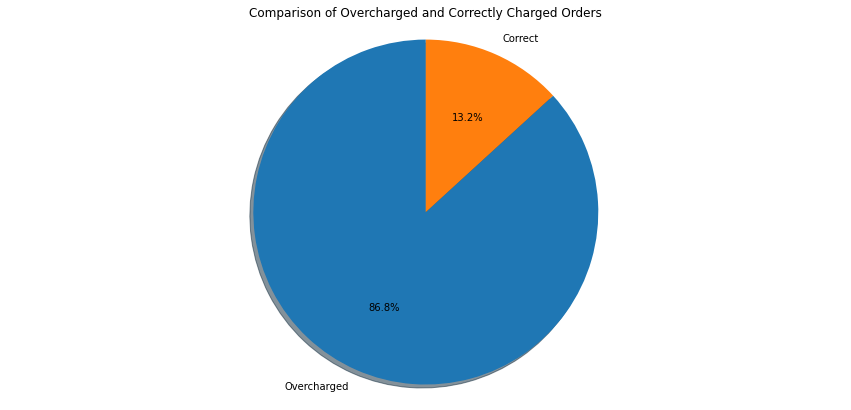

In [143]:
import matplotlib.pyplot as plt

# Data
overcharged_count = overcharged.shape[0]
correct_count = ds[ds['difference']==0].shape[0]

# Plot
labels = ['Overcharged', 'Correct']
sizes = [overcharged_count, correct_count]
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Comparison of Overcharged and Correctly Charged Orders")
plt.show()



In [81]:
# total orders where x has been undercharged
under_charged=ds[ds['Billing Amount (Rs.)']<ds['Expected_cost']]

under_amount=under_charged['Expected_cost'].sum()-under_charged['Billing Amount (Rs.)'].sum()


print("Total Orders where X has been overcharged = {}".format(under_charged.shape[0]))
print("Total overcharging amount = {}".format(round(under_amount,2)))

Total Orders where X has been overcharged = 18
Total overcharging amount = 517.3


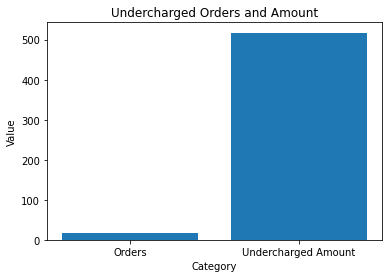

In [125]:
import matplotlib.pyplot as plt

# Calculate the total number of orders and undercharged amount
under_charged=ds[ds['Billing Amount (Rs.)']<ds['Expected_cost']]
under_amount=under_charged['Expected_cost'].sum()-under_charged['Billing Amount (Rs.)'].sum()

# Plot the bar chart
plt.bar(['Orders', 'Undercharged Amount'], [under_charged.shape[0], under_amount])

# Add title and labels to the plot
plt.title('Undercharged Orders and Amount')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()


In [147]:
import pandas as pd

data = {
    'Invoice Type': ['Correctly Charged', 'Overcharged', 'Undercharged'],
    'Count': [ds[ds['difference']==0].shape[0], overcharged.shape[0], under_charged.shape[0]],
    'Amount (Rs.)': [ds[ds['difference']==0]['Expected_cost'].sum(), over_amount, round(under_amount,2)]
}

df = pd.DataFrame(data)
print(df)


        Invoice Type  Count  Amount (Rs.)
0  Correctly Charged     14        1044.0
1        Overcharged     92        4941.9
2       Undercharged     18         517.3


In [148]:
#df.to_excel("invoice_summary.xlsx", index=False)